Training MSE: 1199246846796.91
Training R2 score: 0.66

Testing MSE: 959110878780.88
Testing R2 score: 0.72

Coefficients (slopes): [ 2.48857876e+02  1.34994406e+05  9.50583380e+05  4.18321569e+05
  4.66890751e+05  3.68497644e+05  3.59364424e+05  1.24665331e+06
  8.97037026e+05  2.23301809e+05  6.96754525e+05 -2.30222653e+05]
Intercept (bias): 107133.47334964201



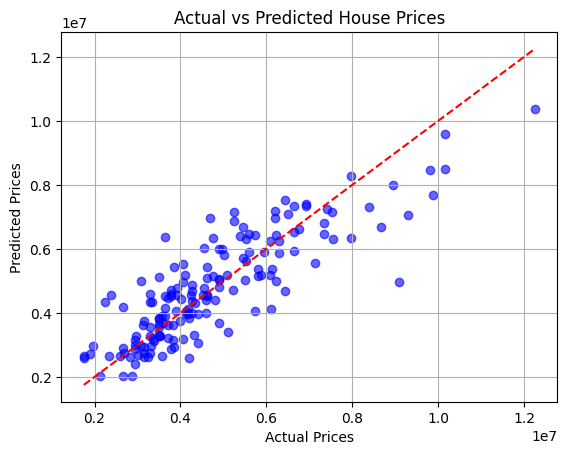

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('/content/Housing.csv')

encoder = LabelEncoder()
for col in ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']:
    df[col] = encoder.fit_transform(df[col])

X = df.iloc[:,1:]
y = df['price']

# as told in the resource Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

model = LinearRegression()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)

train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
print(f'Training MSE: {train_mse:.2f}')
print(f'Training R2 score: {train_r2:.2f}\n')

y_test_pred = model.predict(X_test)

test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)
print(f'Testing MSE: {test_mse:.2f}')
print(f'Testing R2 score: {test_r2:.2f}\n')

print(f'Coefficients (slopes): {model.coef_}')
print(f'Intercept (bias): {model.intercept_}\n')

# giving plot
plt.scatter(y_test, y_test_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Actual vs Predicted House Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.grid(True)
plt.show()